# Perceptron

- Nama: Rayhan Egar Sadtya Nugraha
- NIM: 22515020111014

## Fungsi-fungsi *Plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(f1, f2, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()
    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, f1(line_x))
    plt.plot(line_x, f2(line_x))
    plt.show()

## Praktikum

### a) Fungsi *Step* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [36]:
def percep_step(input, th=0):
  return 1 if input > th else -1 if input < -th else 0

### b) Fungsi *training* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [37]:
def percep_fit(X, target, th=0, a=1, max_epoch=10, verbose=False, draw=False):
  w = np.zeros(len(X[0]) + 1)
  bias = np.ones((len(X), 1))
  X = np.hstack((bias, X))
  stop = False
  epoch = 0
  while not stop and (max_epoch == -1 or epoch < max_epoch):
    stop = True
    epoch += 1
    if verbose:
      print('\nEpoch', epoch)
      for r, row in enumerate(X):
        y_in = np.dot(row, w)
        y = percep_step(y_in, th)
        if y != target[r]:
          stop = False
          w = [w[i] + a * target[r] * row[i] for i in range(len(row))]
          if verbose:
            print('Bobot:', w)
          if draw:
            plot(line(w, th), line(w, -th), X, target)
  return w, epoch


### c) Fungsi *testing* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [38]:
def percep_predict(X, w, th=0):
    Y = []
    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = percep_step(y_in, th)
        Y.append(y)
    return Y

In [39]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
    return sum(s) / len(a)


## Soal


Gunakan dataset "data.csv" yang telah dilampirkan

In [46]:
import pandas as pd

data = pd.read_csv('data.csv')

Kolom Activity berperan sebagai label dan memiliki beberapa kelas:
1. SITTING
2. LAYING
3. WALKING
4. STANDING
5. WALKING_DOWNSTAIRS
6. WALKING_UPSTAIRS

Hapuslah kelas hingga hanya menyisakan kelas: LAYING dan WALKING_UPSTAIRS

In [47]:
data = data[~data['Activity'].isin(['SITTING', 'WALKING', 'STANDING', 'WALKING_DOWNSTAIRS'])] #Praktikan menghapus kelas kelas yang tidak digunakan

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X = data[['x', 'y', 'z']].to_numpy()
X = minmax_scale(X)

y = data['Activity'].to_numpy()
c = {'LAYING': 1, 'WALKING_UPSTAIRS': -1} # Praktikan mengubah kedua kelas target  menjadi 1 dan -1
y = [c[i] for i in y]

X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=10, test_size=.3, random_state=42)

In [49]:
X_train

array([[0.94329285, 0.83984605, 0.66028048],
       [0.82783156, 0.82467745, 0.64828539],
       [0.86488354, 0.8661908 , 0.66324918],
       [0.83473181, 0.8347341 , 0.69617122],
       [0.88765876, 0.8238338 , 0.70048688],
       [0.83031217, 0.84633798, 0.66490805],
       [0.83480039, 0.84665782, 0.66237044],
       [0.83942541, 0.84611987, 0.66035023],
       [0.84725913, 0.8540084 , 0.64456248],
       [0.9004411 , 0.84855594, 0.64820119]])

In [50]:
X_test.shape

(76, 3)

## Learning Rate 0.0001


Epoch 1
Bobot: [0.0001, 9.43292854011307e-05, 8.398460470935009e-05, 6.602804757247447e-05]


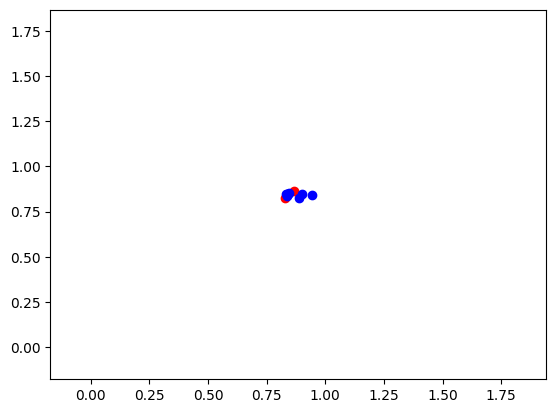

Bobot: [0.0, 1.1546129577773168e-05, 1.5168595402579563e-06, 1.1995082165347872e-06]


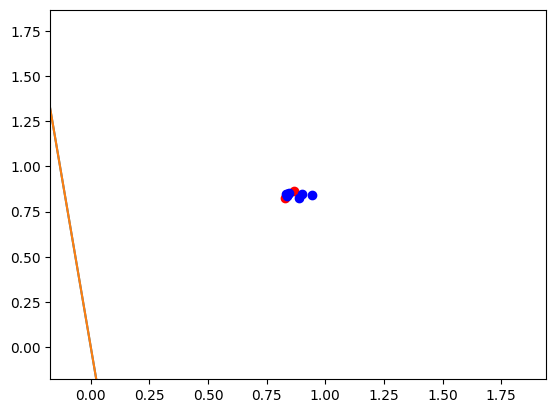

Bobot: [-0.0001, -7.494222468909422e-05, -8.510222092360649e-05, -6.512540989257463e-05]


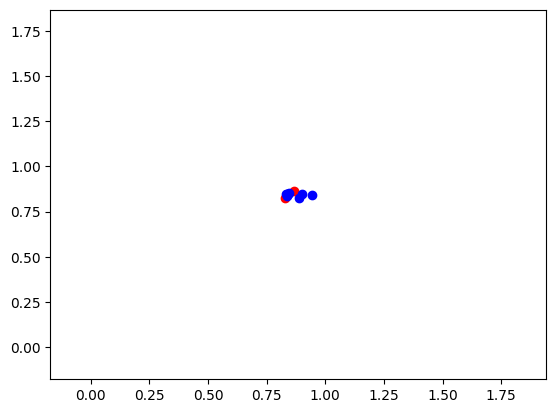

Bobot: [0.0, 8.530956138762906e-06, -1.6288108360576985e-06, 4.491712563753765e-06]


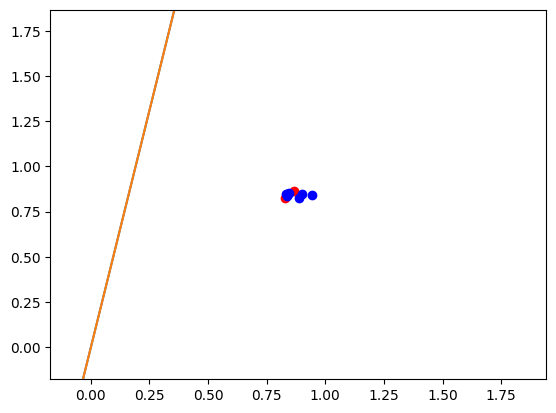


Epoch 2
Bobot: [-0.0001, -7.425219968459463e-05, -8.409655600514983e-05, -6.0336826792185916e-05]


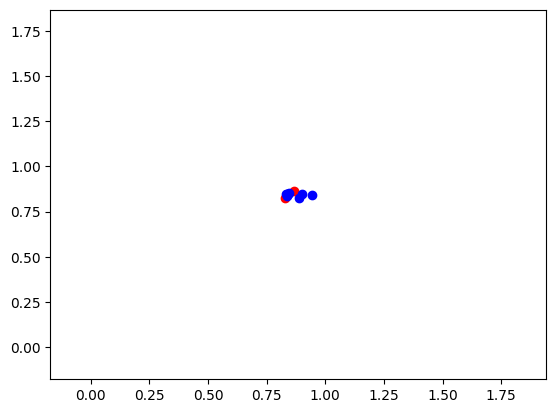

Bobot: [0.0, 9.220981143262497e-06, -6.231459176010381e-07, 9.28029566414248e-06]


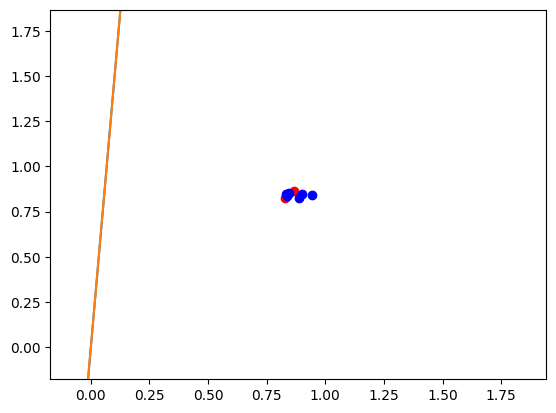


Epoch 3
Bobot: [-0.0001, -7.356217468009504e-05, -8.309089108669317e-05, -5.55482436917972e-05]


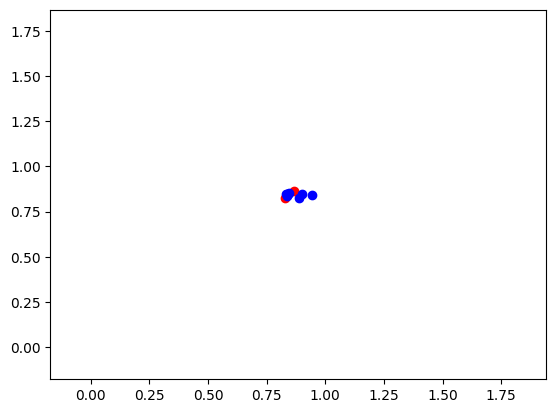

Bobot: [0.0, 9.911006147762089e-06, 3.825190008556223e-07, 1.4068878764531196e-05]


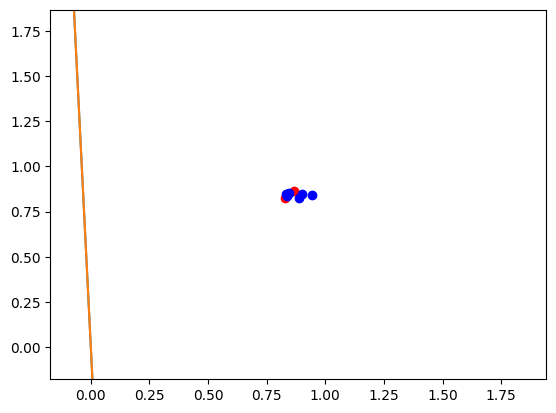


Epoch 4
Bobot: [-0.0001, -7.287214967559545e-05, -8.208522616823651e-05, -5.0759660591408485e-05]


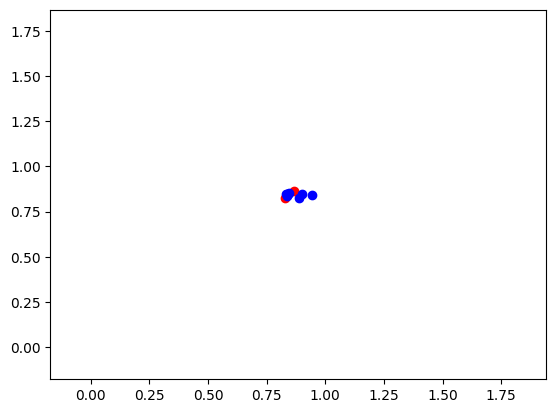

Bobot: [0.0, 1.060103115226168e-05, 1.3881839193122827e-06, 1.885746186491991e-05]


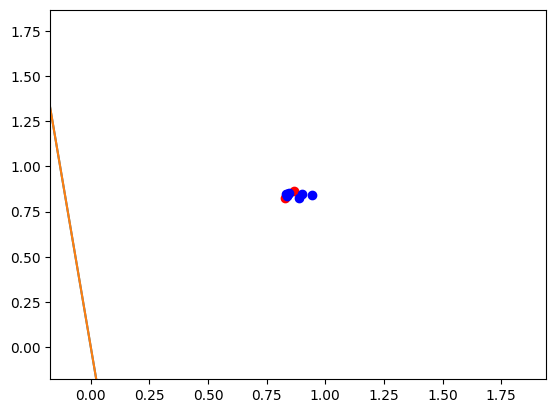


Epoch 5
Bobot: [-0.0001, -7.218212467109586e-05, -8.107956124977985e-05, -4.597107749101977e-05]


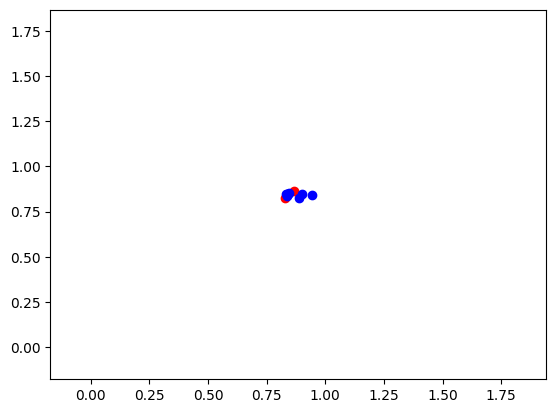

Bobot: [0.0, 1.1291056156761273e-05, 2.393848837768943e-06, 2.3646044965308627e-05]


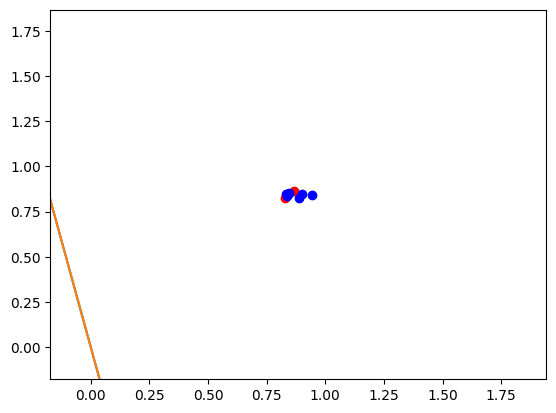


Epoch 6
Bobot: [-0.0001, -7.149209966659626e-05, -8.007389633132319e-05, -4.1182494390631054e-05]


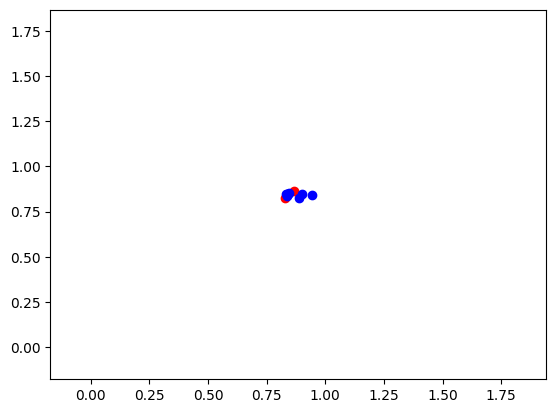

Bobot: [0.0, 1.1981081161260864e-05, 3.3995137562256036e-06, 2.8434628065697343e-05]


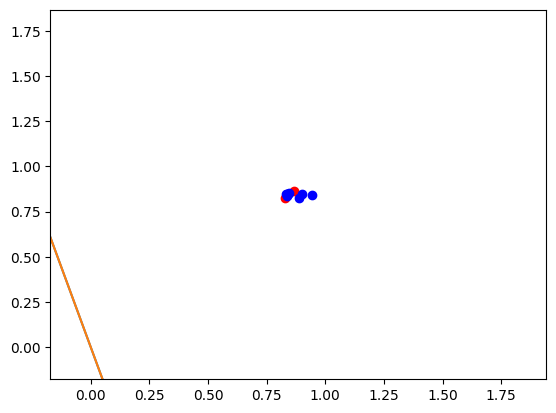


Epoch 7
Bobot: [-0.0001, -7.080207466209667e-05, -7.906823141286653e-05, -3.639391129024234e-05]


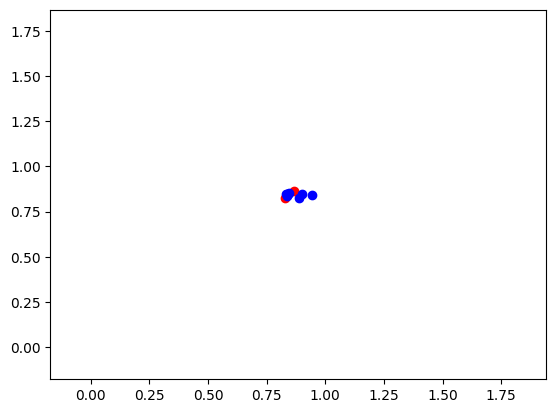

Bobot: [0.0, 1.2671106165760456e-05, 4.405178674682264e-06, 3.322321116608606e-05]


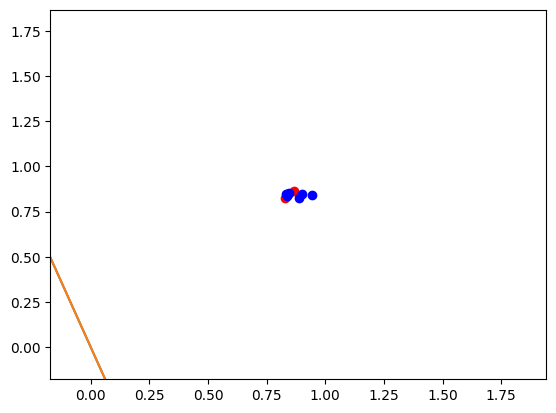


Epoch 8
Bobot: [-0.0001, -7.011204965759708e-05, -7.806256649440987e-05, -3.160532818985362e-05]


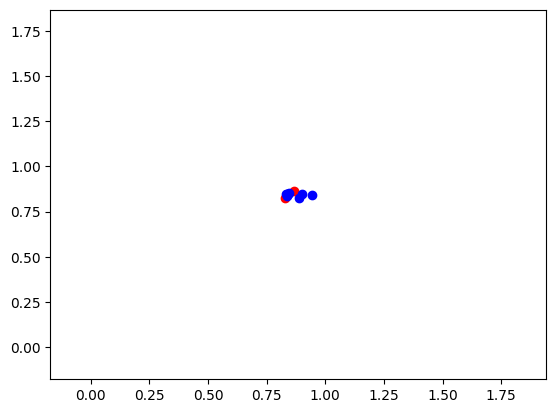

Bobot: [0.0, 1.3361131170260048e-05, 5.410843593138924e-06, 3.8011794266474774e-05]


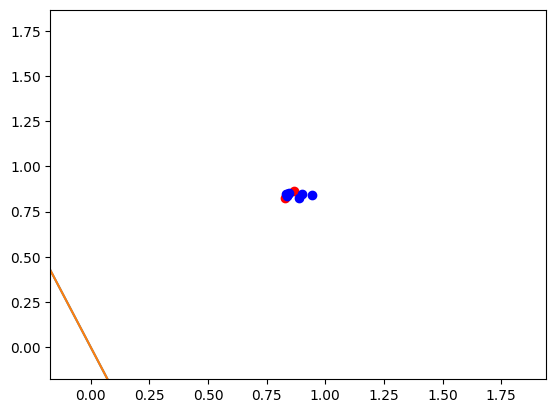


Epoch 9
Bobot: [-0.0001, -6.942202465309749e-05, -7.70569015759532e-05, -2.6816745089464907e-05]


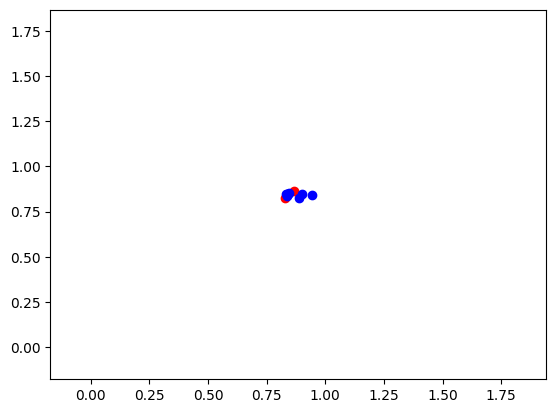

Bobot: [0.0, 1.405115617475964e-05, 6.416508511595585e-06, 4.280037736686349e-05]


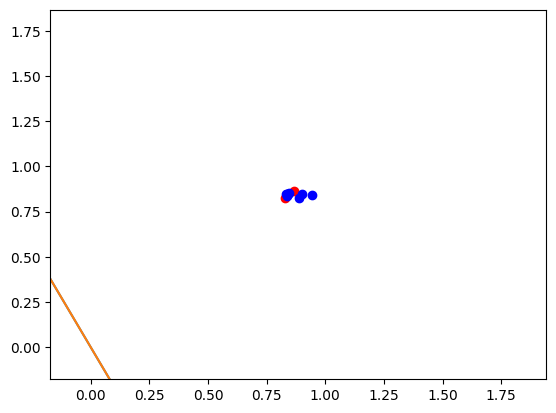


Epoch 10
Bobot: [-0.0001, -6.87319996485979e-05, -7.605123665749654e-05, -2.2028161989076192e-05]


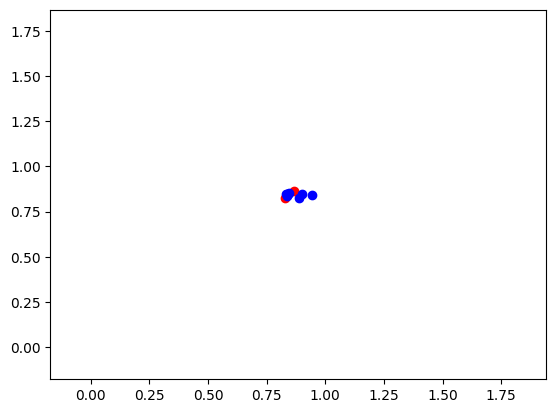

Bobot: [0.0, 1.4741181179259231e-05, 7.422173430052245e-06, 4.7588960467252205e-05]


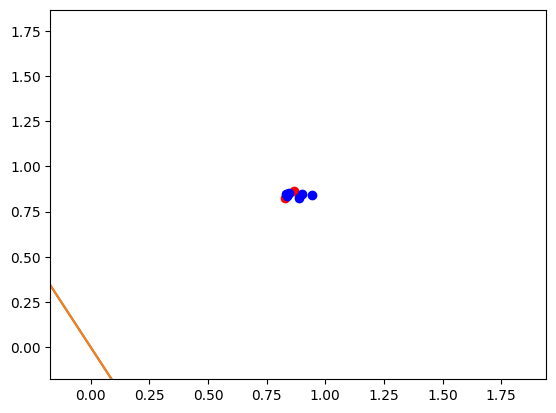

Epochs: 10
Accuracy: 0.6052631578947368


In [51]:
w, epoch = percep_fit(X_train, y_train, a=.0001, verbose=True, draw=True) ## Masukkan nilai learning rate sebesar 0.0001
out = percep_predict(X_test, w)
accuracy_a = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy_a)

### Learning Rate .0001 Result
Hasil accuracy untuk learning rate 1e-4 = 0.6053

## Learning Rate 1


Epoch 1
Bobot: [1.0, 0.943292854011307, 0.8398460470935009, 0.6602804757247447]


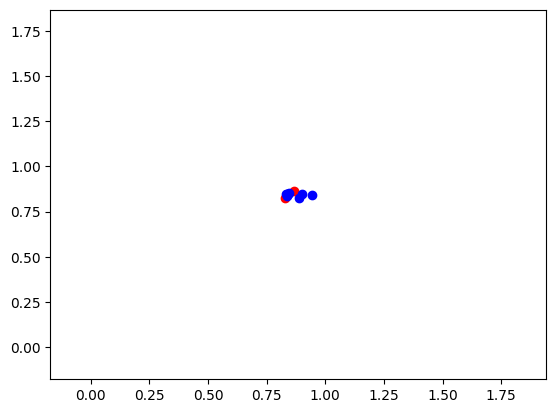

Bobot: [0.0, 0.11546129577773168, 0.015168595402579532, 0.011995082165347837]


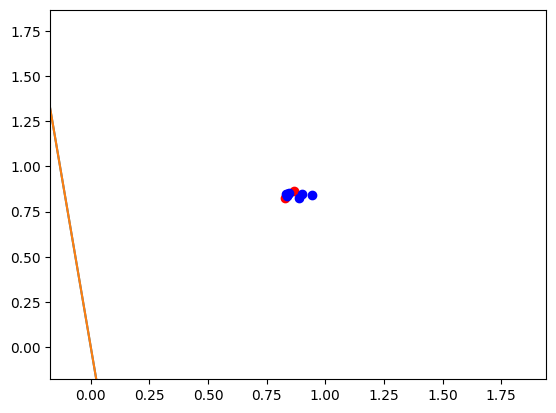

Bobot: [-1.0, -0.7494222468909422, -0.8510222092360649, -0.6512540989257464]


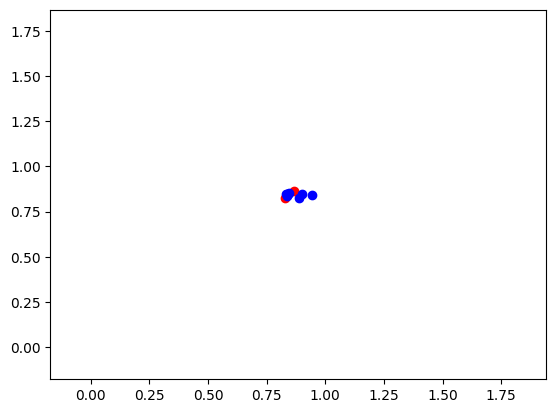

Bobot: [0.0, 0.08530956138762913, -0.016288108360577036, 0.04491712563753758]


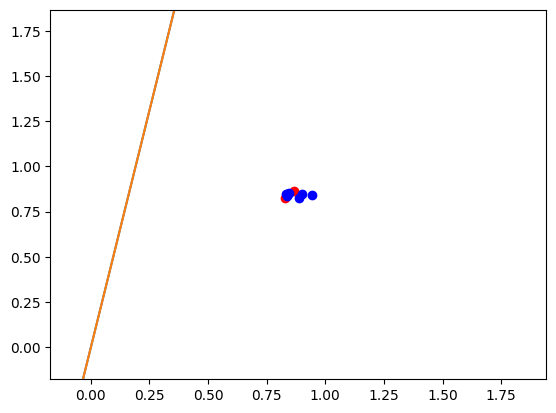


Epoch 2
Bobot: [-1.0, -0.7425219968459462, -0.8409655600514984, -0.6033682679218593]


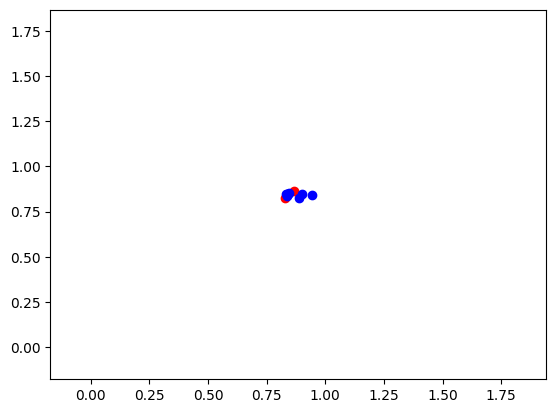

Bobot: [0.0, 0.09220981143262508, -0.006231459176010534, 0.09280295664142468]


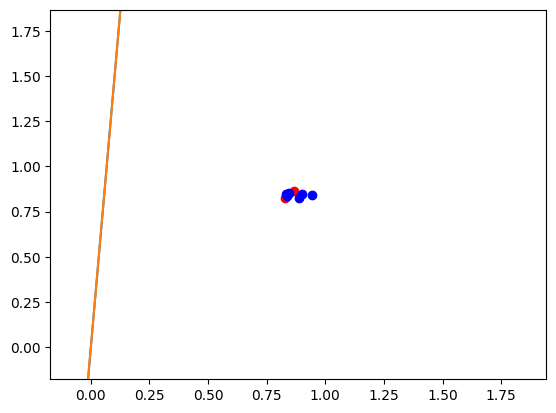


Epoch 3
Bobot: [-1.0, -0.7356217468009503, -0.8309089108669319, -0.5554824369179722]


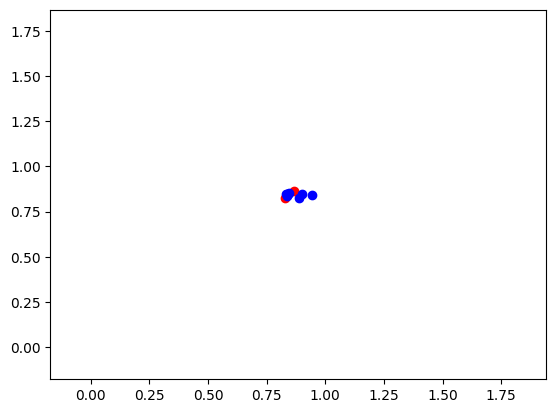

Bobot: [0.0, 0.09911006147762103, 0.0038251900085559676, 0.14068878764531179]


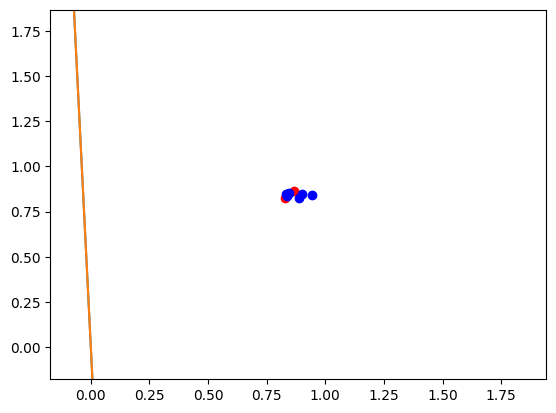


Epoch 4
Bobot: [-1.0, -0.7287214967559543, -0.8208522616823654, -0.5075966059140851]


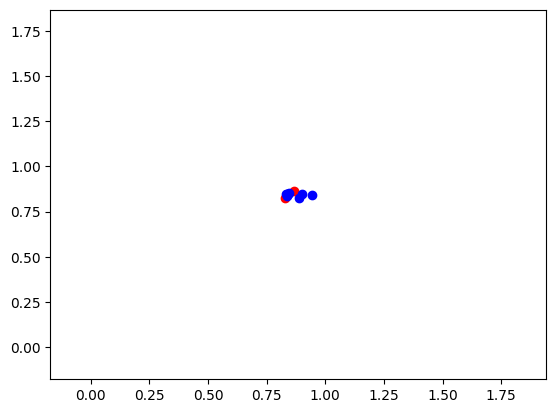

Bobot: [0.0, 0.10601031152261697, 0.01388183919312247, 0.1885746186491989]


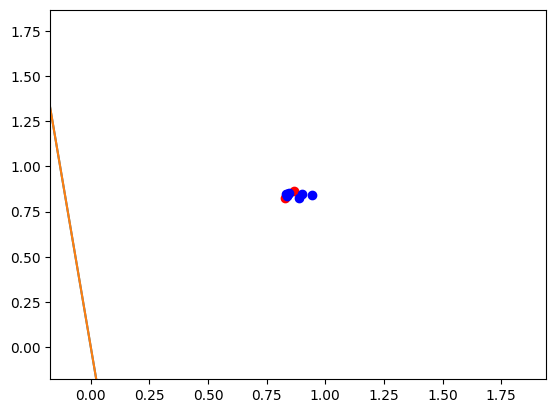


Epoch 5
Bobot: [-1.0, -0.7218212467109584, -0.8107956124977989, -0.45971077491019796]


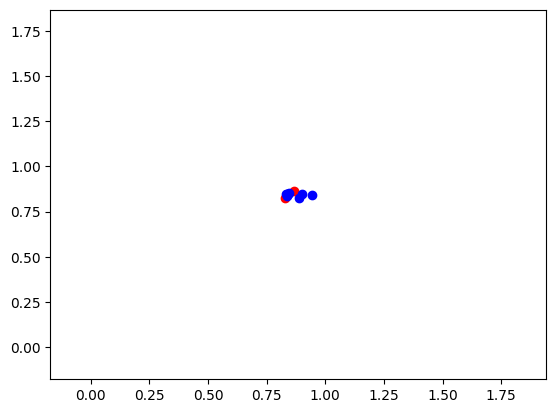

Bobot: [0.0, 0.11291056156761292, 0.02393848837768897, 0.236460449653086]


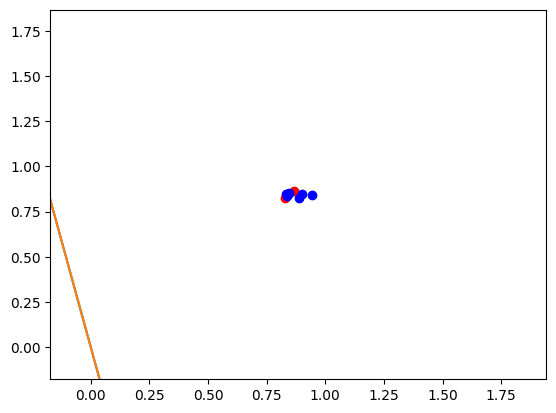


Epoch 6
Bobot: [-1.0, -0.7149209966659624, -0.8007389633132324, -0.41182494390631086]


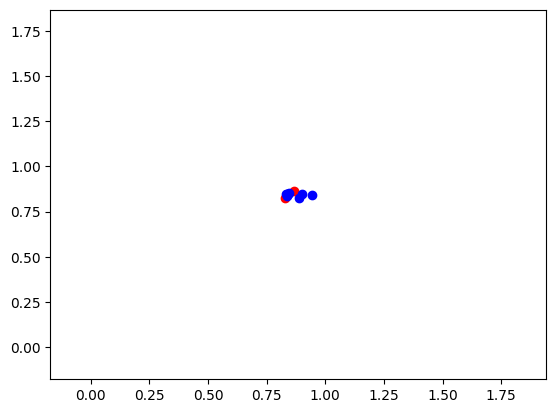

Bobot: [0.0, 0.11981081161260887, 0.03399513756225547, 0.2843462806569731]


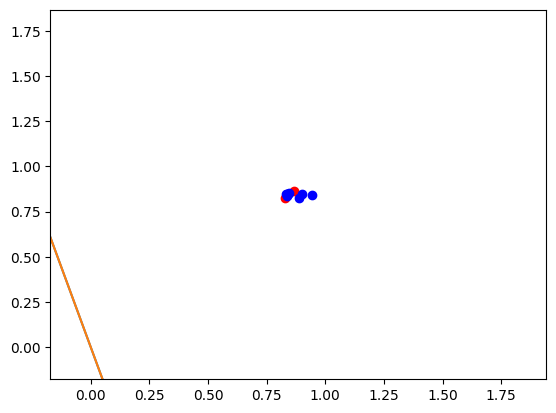


Epoch 7
Bobot: [-1.0, -0.7080207466209665, -0.7906823141286659, -0.36393911290242376]


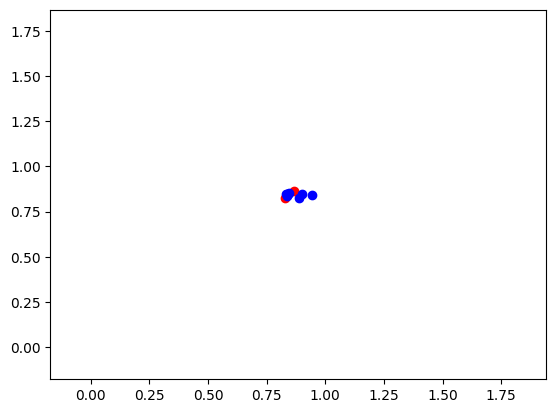

Bobot: [0.0, 0.12671106165760482, 0.044051786746821975, 0.3322321116608602]


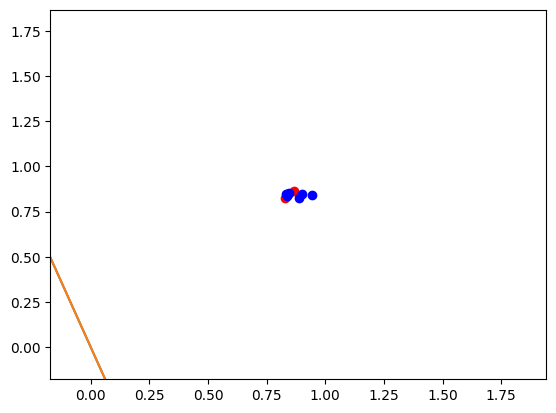


Epoch 8
Bobot: [-1.0, -0.7011204965759705, -0.7806256649440994, -0.31605328189853665]


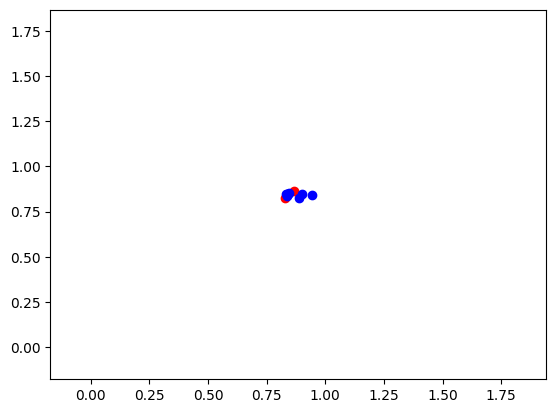

Bobot: [0.0, 0.13361131170260077, 0.05410843593138848, 0.3801179426647473]


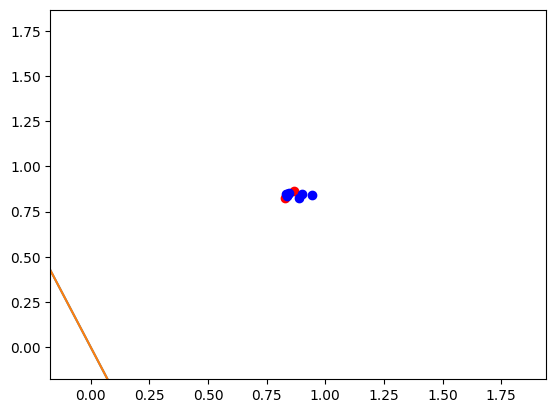


Epoch 9
Bobot: [-1.0, -0.6942202465309746, -0.7705690157595328, -0.26816745089464955]


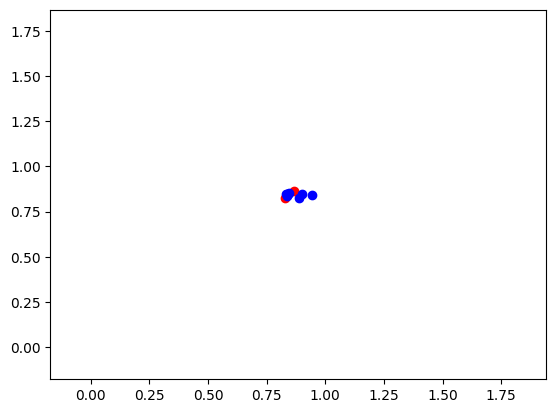

Bobot: [0.0, 0.1405115617475967, 0.06416508511595498, 0.4280037736686344]


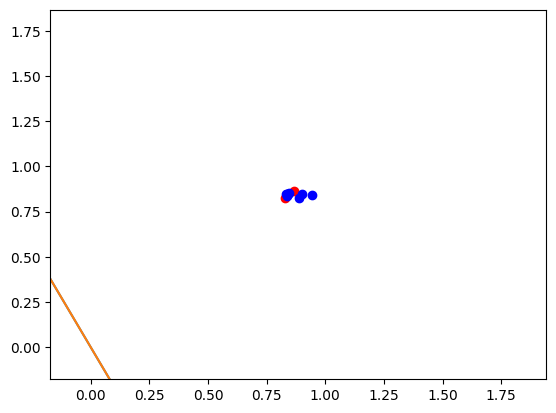


Epoch 10
Bobot: [-1.0, -0.6873199964859786, -0.7605123665749663, -0.22028161989076245]


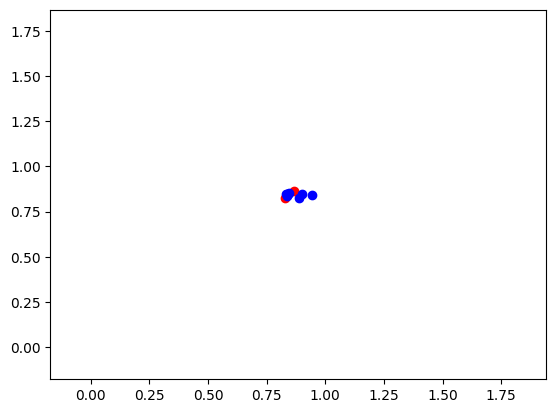

Bobot: [0.0, 0.14741181179259266, 0.07422173430052148, 0.4758896046725215]


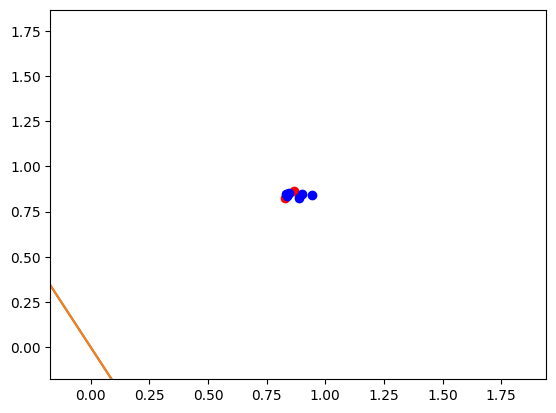

Epochs: 10
Accuracy: 0.6052631578947368


In [52]:
w, epoch = percep_fit(X_train, y_train, a=1, verbose=True, draw=True) ## Masukkan nilai learning rate sebesar 1
out = percep_predict(X_test, w)
accuracy_b = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy_b)

### Leaning Rate 1 Result
Hasil akurasi dengan learning rate 1 = 0.6053

**Pertanyaan**  
Dikarenakan training untuk mencapai akurasi 1.0 memakan waktu yang lama kita membatasi max epoch menjadi 10. Perhatikan bobot dari kedua proses training di atas. Bandingkan hasil yang didapatkan dan jelaskan apa pengaruh learning rate yang di masukkan!

Jawab:
1. Hasil akurasi dari kedua model Perceptron dengan learning rate 0.0001 (versi 'a') dan model perceptron dengan learning rate 1 (versi 'b') memiliki nilai yang sama: 0.6053.
2. Pengaruh dari learning rate adalah bagaimana model menyesuaikan decision boundary untuk data dan epoch selanjutnya. Dapat terlihat dari hasil plot model Perceptron dengan learning rate 0.0001 jika decision boundary bergeser sedikit demi sedikit. Sedangkan, pada hasil plot model Perceptron dengan learning rate 1, decision boundary berosilasi dengan selisih yang cukup jauh. Akan tetapi, kedua learning rate tersebut tidak bisa menyesuaikan decision boundary secara optimal.
3. Dari running time kedua jenis learning time tersebut, diketahui jika learning rate yang kecil memiliki kecepatan konvergensi yang lebih kecil. Dengan demikian, untuk mencapai konvergensi yang sama antara a=0.0001 dan a=1, model Perceptron dengan a=0.0001 memerlukan proses iterasi yang lebih panjang pula.